# Le Type de Donnée Abstrait<BR>Ensemble (Set)

In [1]:
import include.helpers as h

In [20]:
class Noeud:
    def __init__(self,val):
        self.clef = val
        self.gauche = None
        self.droite = None   
    def __str__(self): 
        return "{}".format(self.clef)
    def copy(self):
        return Noeud(self.clef)
    
def inserer(R,val):
    if R == None:      R = Noeud(val)      
    elif val < R.clef: R.gauche = inserer(R.gauche,val)    
    elif val > R.clef: R.droite = inserer(R.droite,val)
    else:              pass
    return R

def creer_ABR(T):
    R = None
    for t in T: R = inserer(R,t)
    return R

def str_trie(R):
    s = ""
    if R:
        s += str_trie(R.gauche)
        s += R.__str__() + " "
        s += str_trie(R.droite)
    return s

def copier_rec(R):
    if R:
        C = Noeud(R.clef)
        C.gauche = copier_rec(R.gauche)
        C.droite = copier_rec(R.droite)
        return C
    else: return None

In [31]:
class Ensemble:
    def __init__(self,T = []):
        self.R = creer_ABR(T)
    def __str__(self):
        return str_trie(self.R)
    def copier(self):
        E = Ensemble()
        E.R = copier_rec(self.R)
        return E
    def inserer(self,val):
        self.R = inserer(self.R,val)

0 3 6 9 12 


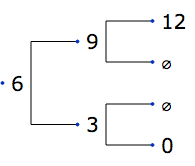

In [33]:
T1 = [ 6, 9, 3, 0, 12 ]
E1 = Ensemble(T1)
print(E1)
h.afficher_arbre_binaire(E1.R)

0 2 4 6 8 10 12 


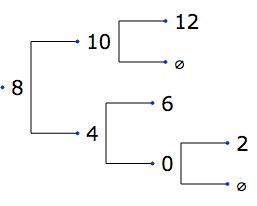

In [34]:
T2 = [ 8, 4, 0, 2, 6, 10, 12 ]
E2 = Ensemble(T2)
print(E2)
h.afficher_arbre_binaire(E2.R)

In [23]:
# Entrées: arbre de racine R
#          liste L en cours de création, 
#          nombre n d'éléments dans L  
# Sorties: L et n mis à jour par l'ajout de R et de ses descendants

def lineariser(R, L = None, n = 0):
    if R == None: return L, n

    L, n = lineariser(R.droite, L, n)
        
    R.droite = L   # ajouter R en tête de liste L
    L = R        
    n += 1
    
    L, n = lineariser(R.gauche, L, n)
    R.gauche = None
    
    return L, n

In [6]:
def arboriser(L,n):
    if n == 0: return None, L
        
    RG, L = arboriser(L,(n-1)//2)
    
    R = L
    R.gauche = RG
    L = L.droite
    
    R.droite , L = arboriser(L,n//2)
    return R, L

In [24]:
def union_ABR_degeneres(L1,L2,n1,n2):
    L = Noeud(""); Q = L;
    n = n1 + n2
    while L1 != None and L2 != None:
        if L1.clef < L2.clef:
            Q.droite = L1; 
            L1 = L1.droite
        elif L1.clef > L2.clef: 
            Q.droite = L2
            L2 = L2.droite
        else: # clé dupliquée
            Q.droite = L1
            L1 = L1.droite; L2 = L2.droite
            n -= 1
        Q = Q.droite
    if L1: Q.droite = L1; 
    if L2: Q.droite = L2; 
    L = L.droite
    return L, n

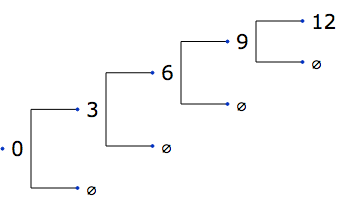

In [25]:
L1,n1 = lineariser(R1)
h.afficher_arbre_binaire(L1)

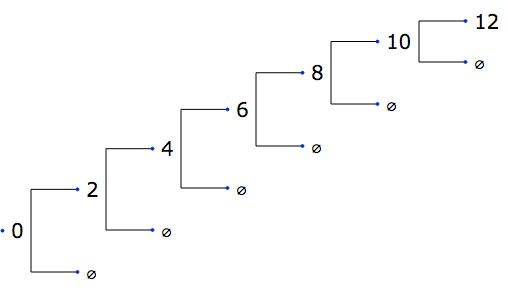

In [26]:
L2,n2 = lineariser(R2)
h.afficher_arbre_binaire(L2)

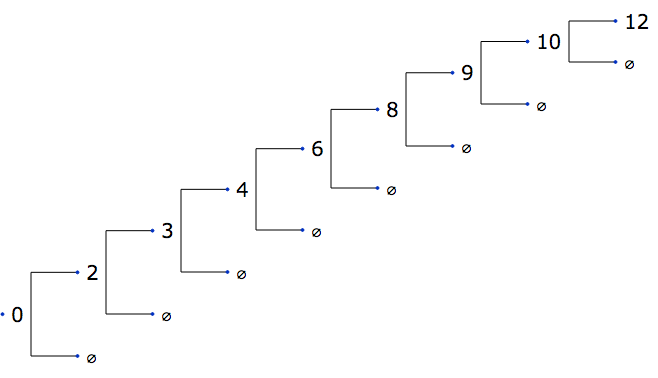

In [29]:
L,n = union_ABR_degeneres(L1,L2,n1,n2)
h.afficher_arbre_binaire(L)

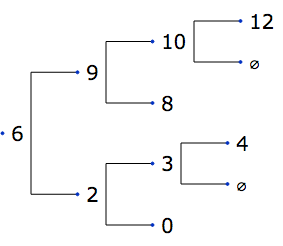

In [30]:
R,L = arboriser(L,n)
h.afficher_arbre_binaire(R)

In [35]:
def union_ensembles(E1,E2):
    U = Ensemble()
    C1 = E1.copier() 
    C2 = E2.copier()
    L1,n1 = lineariser(C1.R)
    L2,n2 = lineariser(C2.R)
    L,n = union_ABR_degeneres(L1,L2,n1,n2)
    U.R, L = arboriser(L,n)
    return U

In [36]:
U = union_ensembles(E1,E2)
print(E1)
print(E2)
print(U)

0 3 6 9 12 
0 2 4 6 8 10 12 
0 2 3 4 6 8 9 10 12 


In [46]:
def intersection_ABR_degeneres(L1,L2):
    L = Noeud(""); Q = L;
    n = 0
    while L1 != None and L2 != None:
        if L1.clef < L2.clef:
            L1 = L1.droite
        elif L1.clef > L2.clef: 
            L2 = L2.droite
        else: # clé dupliquée
            Q.droite = L1
            Q = Q.droite
            L1 = L1.droite; L2 = L2.droite
            n += 1
    L = L.droite
    Q.droite = None
    return L, n

In [58]:
def intersection_ensembles(E1,E2):
    I = Ensemble()
    C1 = E1.copier(); 
    C2 = E2.copier(); 
    L1,n1 = lineariser(C1.R); 
    L2,n2 = lineariser(C2.R); 
    L,n = intersection_ABR_degeneres(L1,L2); 
    I.R, L = arboriser(L,n)
    return I

In [59]:
I = intersection_ensembles(E1,E2)
print(E1)
print(E2)
print(I)

0 3 6 9 12 
0 2 4 6 8 10 12 
0 6 12 


<table style="width: 100%; border: 0px">
<tr style="background-color:white; border:0px">
<td style="width: 120px; border: 0px">
    <img src="https://heig-vd.ch/ResourcePackages/WhiteFox/assets/images/logo-heig-vd.svg" height=200px align=left >
    </td>
    <td style="vertical-align: middle; border: 0px" height=200px>
    <p style="text-align: left">
        <a href="https://ocuisenaire.github.io/ASD1-notebooks/">ASD1 Notebooks on GitHub.io</a>
 </p>        
<p style="text-align: left">
© Olivier Cuisenaire, 2018 </p>
</td>
</tr>
</table>